In [67]:
str(rock)

'data.frame':	48 obs. of  4 variables:
 $ area : int  4990 7002 7558 7352 7943 7979 9333 8209 8393 6425 ...
 $ peri : num  2792 3893 3931 3869 3949 ...
 $ shape: num  0.0903 0.1486 0.1833 0.1171 0.1224 ...
 $ perm : num  6.3 6.3 6.3 6.3 17.1 17.1 17.1 17.1 119 119 ...


In [68]:
var(rock$perm)

[1] 191684.8

In [69]:
attach(rock)

The following objects are masked from rock (pos = 3):

    area, peri, perm, shape

The following objects are masked from rock (pos = 4):

    area, peri, perm, shape



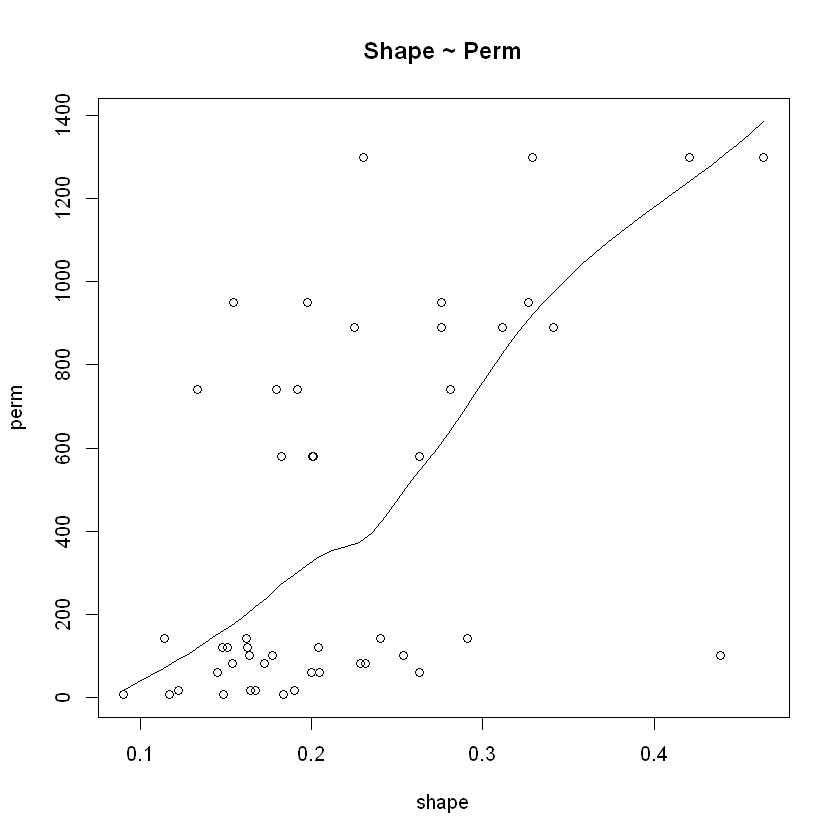

In [70]:
scatter.smooth(x=shape, y=perm, main="Shape ~ Perm")  # scatterplot


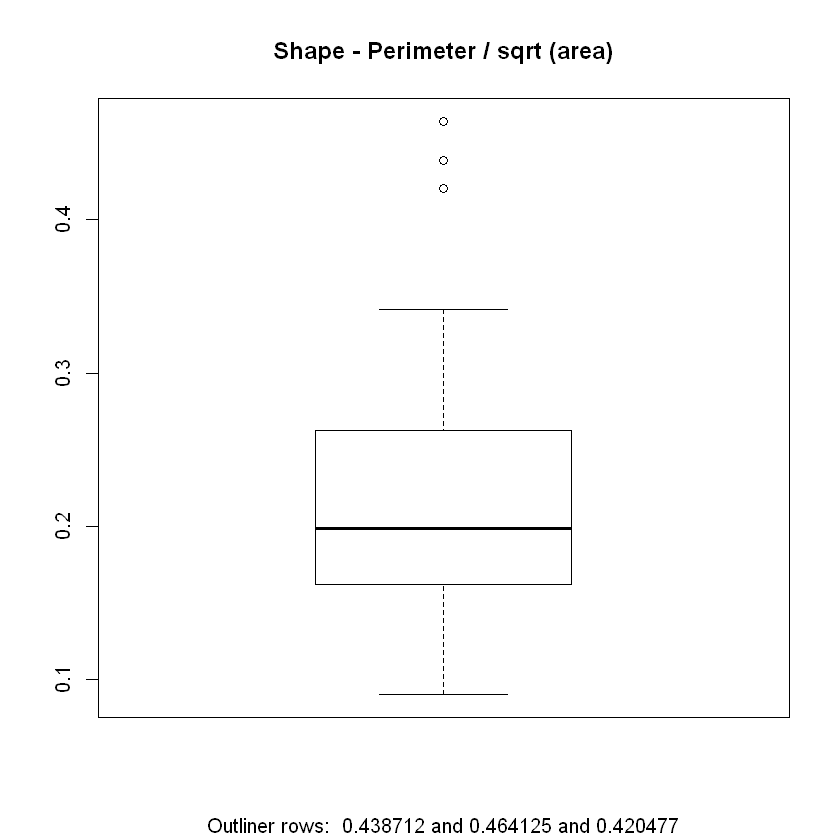

In [71]:
boxplot(shape,
        main="Shape - Perimeter / sqrt (area)", 
        sub = paste("Outliner rows: ", paste(boxplot.stats(shape)$out, collapse=' and ')
));

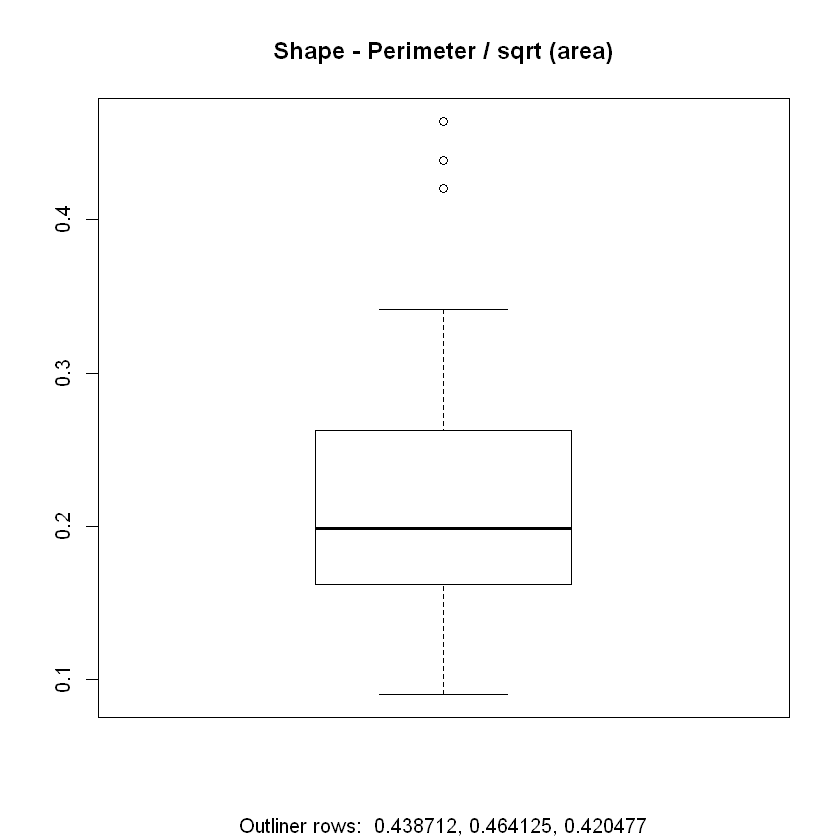

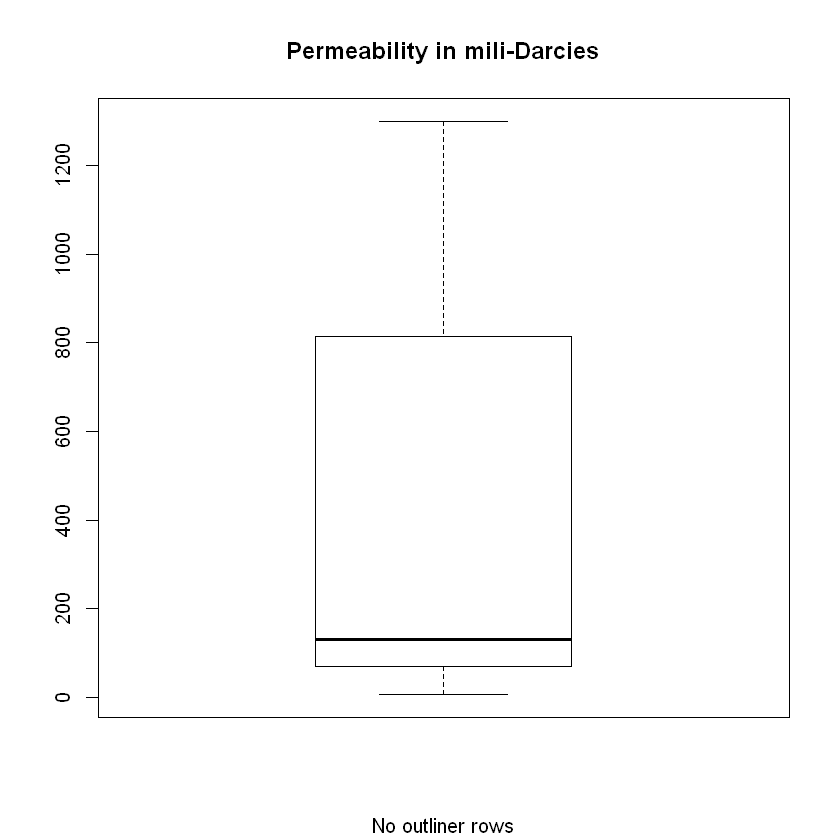

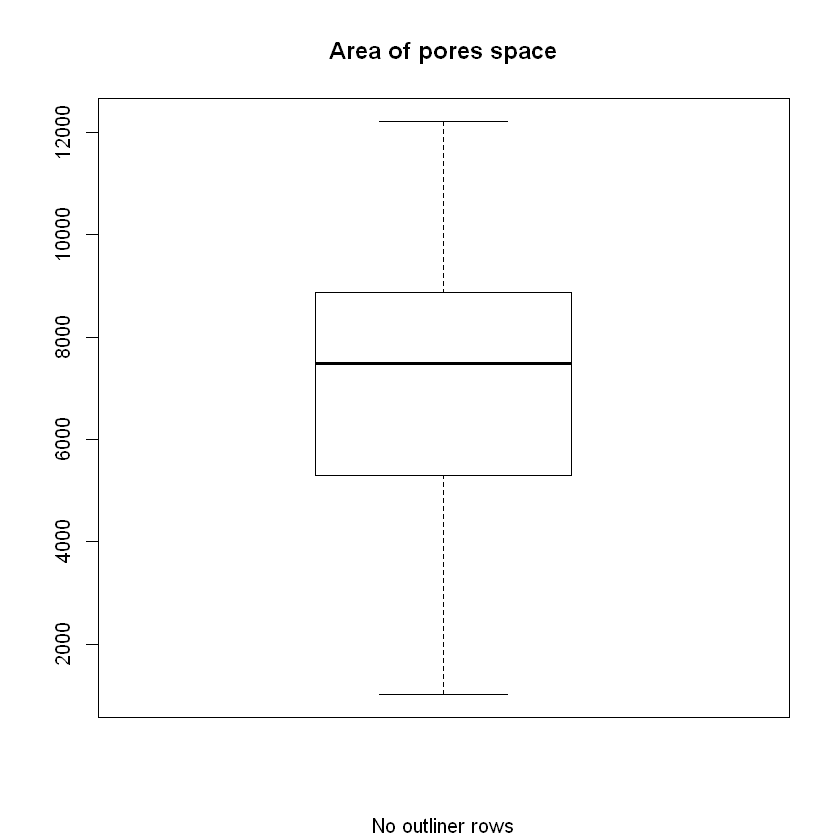

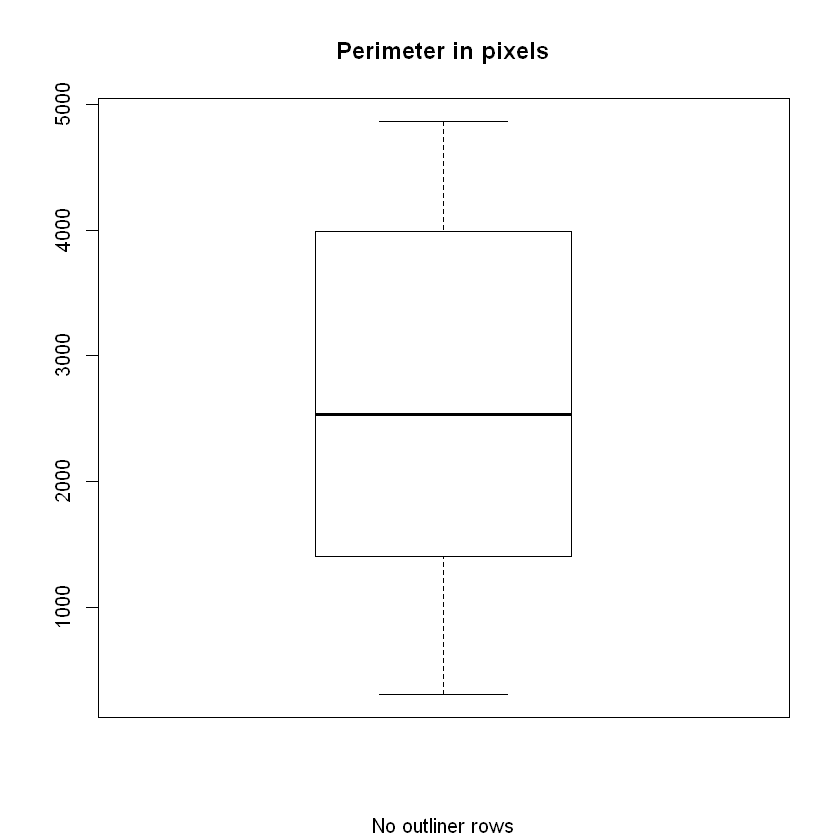

In [82]:
boxplot(shape,
        main="Shape - Perimeter / sqrt (area)", 
        sub = paste("Outliner rows: ", paste(boxplot.stats(shape)$out, collapse=', ')
));

boxplot(perm, main="Permeability in mili-Darcies", sub = paste("No outliner rows"));

boxplot(area, main="Area of pores space", sub = paste("No outliner rows"));

boxplot(peri, main="Perimeter in pixels", sub = paste("No outliner rows"));

In [75]:
 boxplot.stats(shape)

$stats
[1] 0.0903296 0.1621295 0.1988620 0.2626890 0.3412730

$n
[1] 48

$conf
[1] 0.1759291 0.2217949

$out
[1] 0.438712 0.464125 0.420477

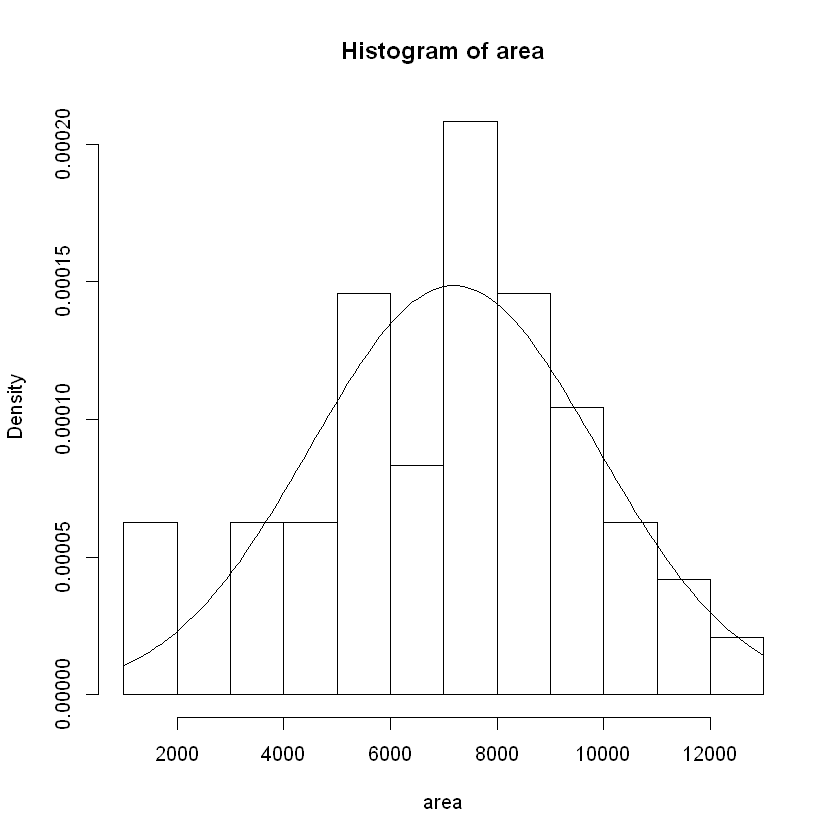

In [137]:
hist(area,  breaks = 14, probability = T)
curve(dnorm(x, mean=mean(area), sd=sd(area)), add=TRUE)




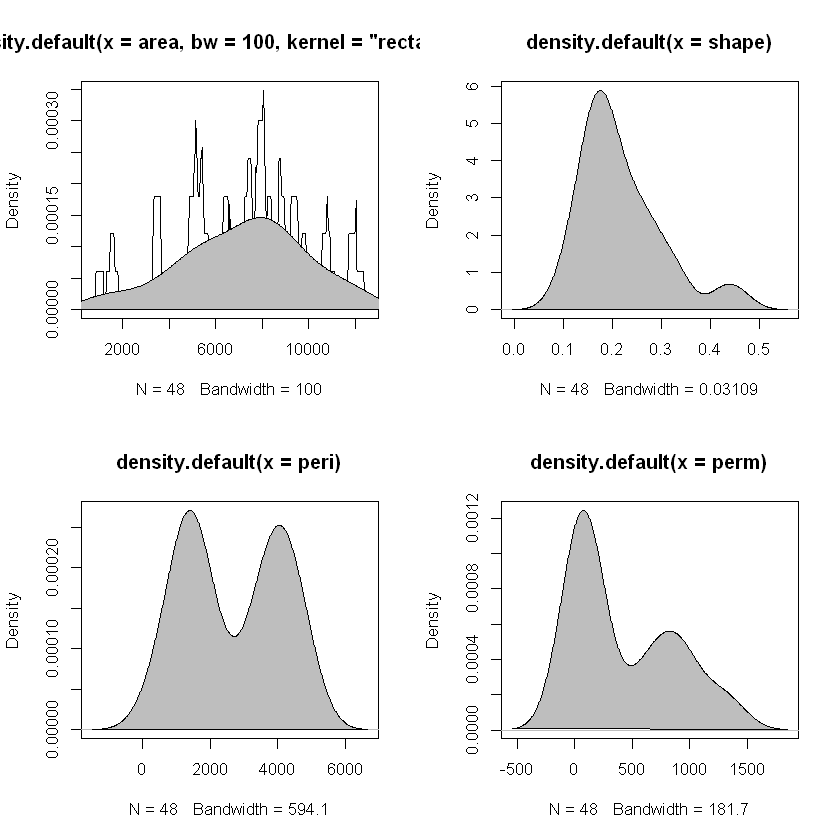

In [149]:
par(mfrow = c(2, 2))
plot(density(area, bw= 100, kernel="rectangular"))
polygon(density(area), col="gray")
plot(density(shape))
polygon(density(shape), col="gray")
plot(density(peri))
polygon(density(peri), col="gray")
plot(density(perm))
polygon(density(perm), col="gray")

In [159]:
linearMod <- lm(perm ~ shape, data=rock)

In [160]:
print(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Coefficients:
(Intercept)        shape  
     -221.3       2919.2  



In [161]:
summary(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Residuals:
   Min     1Q Median     3Q    Max 
-959.4 -250.5 -104.8  230.5  849.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -221.3      149.8  -1.477    0.146    
shape         2919.2      642.2   4.545 3.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 367.6 on 46 degrees of freedom
Multiple R-squared:  0.3099,	Adjusted R-squared:  0.2949 
F-statistic: 20.66 on 1 and 46 DF,  p-value: 3.969e-05


# Construim regresia multipla

In [283]:
fit <- lm(perm ~ area + peri, data=rock)

In [284]:
summary(fit)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),696.6882869,107.00334034,6.510902,5.430904e-08
area,0.1063866,0.02406251,4.421261,6.138803e-05
peri,-0.3899456,0.04510854,-8.644607,4.051815e-11


In [285]:
summary(fit)


Call:
lm(formula = perm ~ area + peri, data = rock)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.26  -63.61   -1.70  111.35  615.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 696.68829  107.00334   6.511 5.43e-08 ***
area          0.10639    0.02406   4.421 6.14e-05 ***
peri         -0.38995    0.04511  -8.645 4.05e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 251.8 on 45 degrees of freedom
Multiple R-squared:  0.6833,	Adjusted R-squared:  0.6692 
F-statistic: 48.54 on 2 and 45 DF,  p-value: 5.823e-12


In [292]:
f <- summary(fit)$fstatistic

In [294]:
model_p <- pf(f[1], f[2], f[3], lower=F)

In [295]:
trainingRowIndex <- sample(1:nrow(rock), 0.8 * nrow(rock))
trainingData <- rock[trainingRowIndex, ]
testData <- rock[-trainingRowIndex, ]

In [298]:
toFit <- lm (perm ~ area + peri, data = trainingData)
permPred <- predict(toFit, testData)

In [299]:
summary(toFit)


Call:
lm(formula = perm ~ area + peri, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-546.86  -70.65    0.56  104.12  638.47 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 666.02851  114.02754   5.841 1.25e-06 ***
area          0.12226    0.02829   4.321 0.000122 ***
peri         -0.41704    0.05391  -7.736 4.40e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 241.5 on 35 degrees of freedom
Multiple R-squared:  0.7003,	Adjusted R-squared:  0.6831 
F-statistic: 40.89 on 2 and 35 DF,  p-value: 6.964e-10


In [300]:
actuals_preds <- data.frame(cbind(actuals=testData$perm, 
                                  predicteds=permPred))  # make actuals_predicteds dataframe.


In [301]:
correlation_accuracy <- cor(actuals_preds)

In [302]:
head(actuals_preds)

,actuals,predicteds
1,6.3,111.778911
5,17.1,-9.547709
9,119.0,156.611727
17,58.6,84.264290
29,890.0,689.801568
30,890.0,747.512121


In [303]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  


In [306]:
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)  

In [307]:
mape

[1] 2.510331

In [313]:
library(DAAG)

ERROR: Error in library(DAAG): there is no package called 'DAAG'


ERROR: Error in CVlm(df = rock, form.lm = perm ~ area + peri, m = 5, dots = FALSE, : could not find function "CVlm"
